In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamondscsv/diamonds.csv


# About Dataset

In this section, we will be using Diamonds dataset which contains the information about diamonds.

Dataset has 10 columns which are:

carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

price: price in US dollars ($326--$18,823)

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

In [2]:
# importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas.api.types import CategoricalDtype

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Setting the plot size
sns.set(rc={'figure.figsize': (10,8)})

In [4]:
# Load Diamonds Dataset from seaborn library
data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Let's take a closer look at the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


* There is no missing value.

In [6]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [7]:
data["cut"].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [8]:
data["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [9]:
data["cut"]

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

Text(0.5, 1.0, 'Cut Quality and Values ')

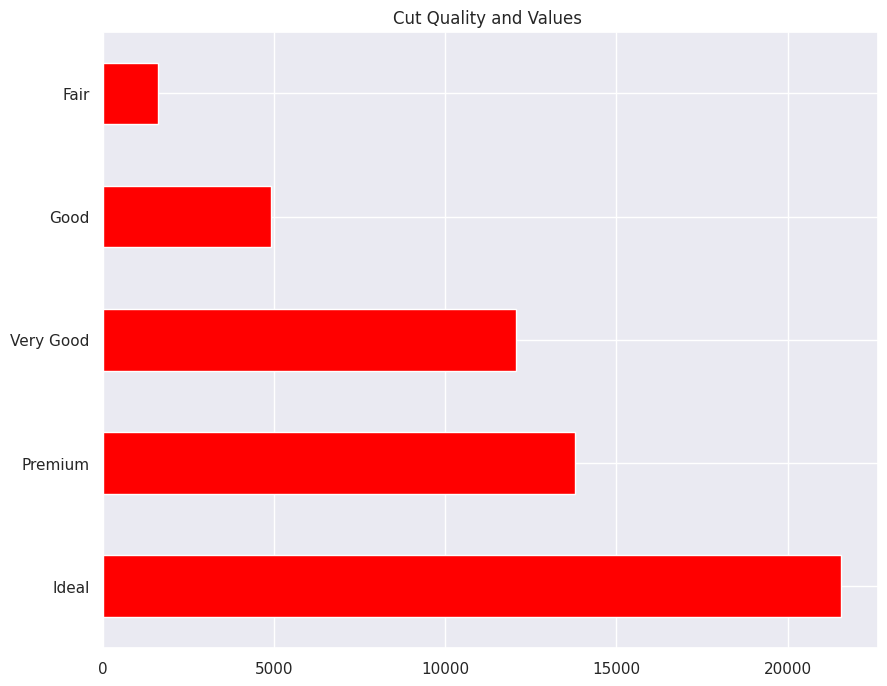

In [10]:
data["cut"].value_counts().plot.barh(color='red').set_title("Cut Quality and Values ")

* When we look at the cut quality values, we see that most of the diamonds have the Ideal Cut.

In [11]:
data["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [12]:
data["color"].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

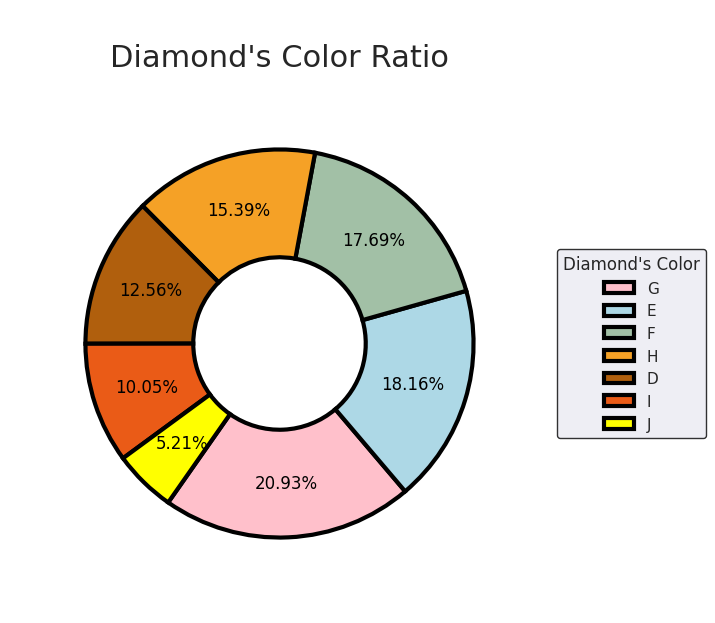

In [13]:
plt.subplots(figsize=(7, 7))

labels = "G","E","F","H","D","I","J"
size = 0.5

wedges, texts, autotexts = plt.pie([data["color"].value_counts().values[0],
                                    data["color"].value_counts().values[1],
                                    data["color"].value_counts().values[2],
                                    data["color"].value_counts().values[3],
                                    data["color"].value_counts().values[4],
                                    data["color"].value_counts().values[5],
                                    data["color"].value_counts().values[6]],
                                    explode = (0,0,0,0,0,0,0),
                                    textprops=dict(size= 12, color= "black"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["pink","lightblue","#a2c0a6","#f5a126","#b05f0d","#ea5b17","yellow"], 
                                    shadow = False,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 3),
                                    startangle = -125)

plt.legend(wedges, labels, title="Diamond's Color",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nDiamond's Color Ratio",fontsize=22)
plt.show()

* When we look at the information part of the diamond dataset, it is said that the best color is D. Even if we consider the color D to be of good quality, in this visualization we see that the majority have 20.93% of the color G.
* Diamonds have 5.21% of the worst color, the J color.

In [14]:
data["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

Text(0.5, 1.0, 'Clarity - Price - Color')

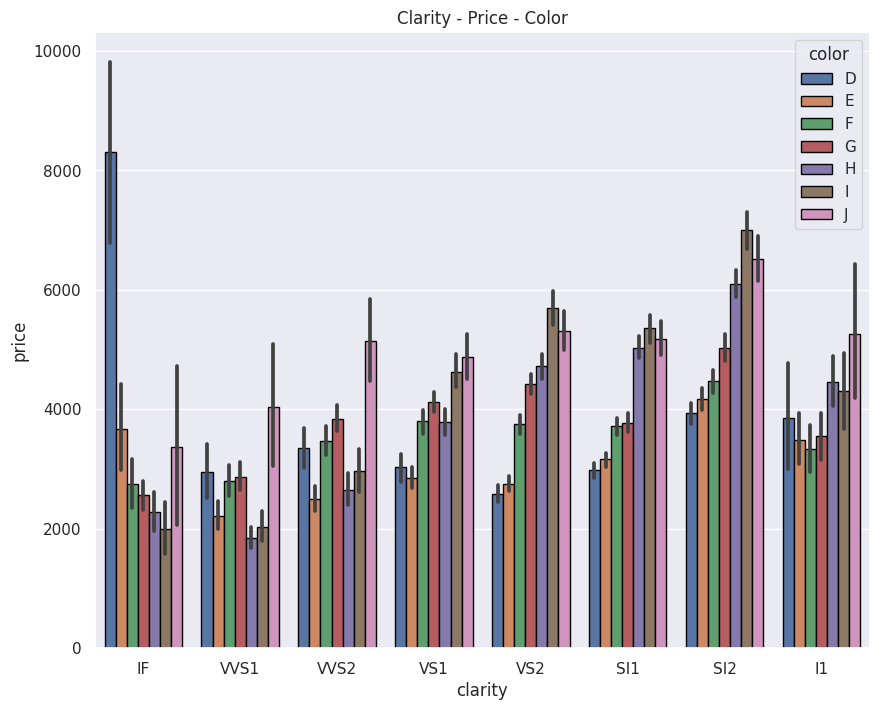

In [15]:
sns.barplot(x="clarity",
            y="price",
            hue="color",
            data=data, 
            width= 0.8, edgecolor= 'black')
plt.title("Clarity - Price - Color")

* When we consider the categorical values of clarity and color together, I don't think we get the expected value in terms of price. For example; When we look at the bar chart, the price value of the diamond with the best value in clarity IF and the best color D is as high as it should be. However, the price of the diamond with SI2 clarity (closest to the worst) and color I seems to be quite high.

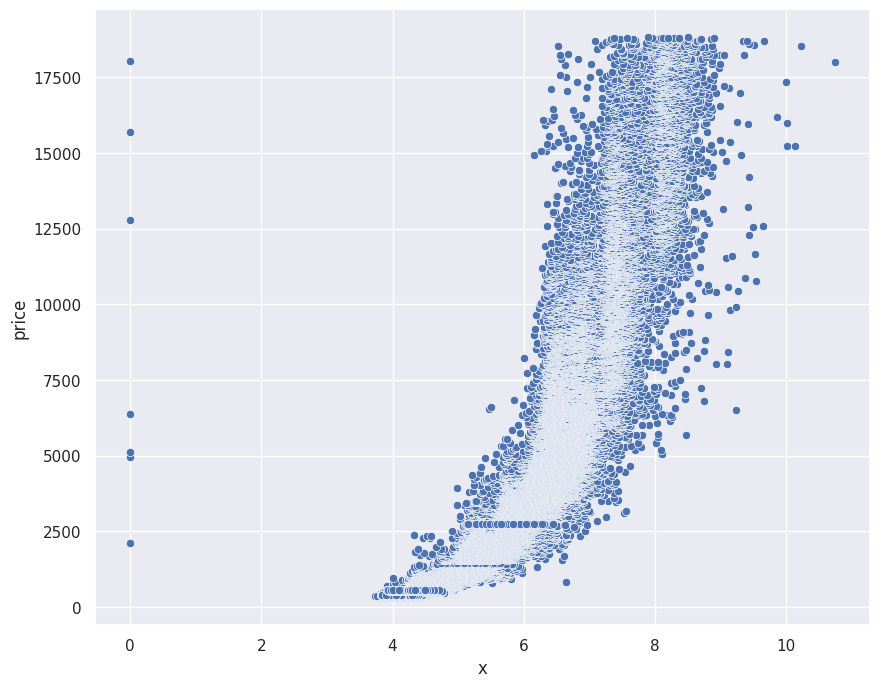

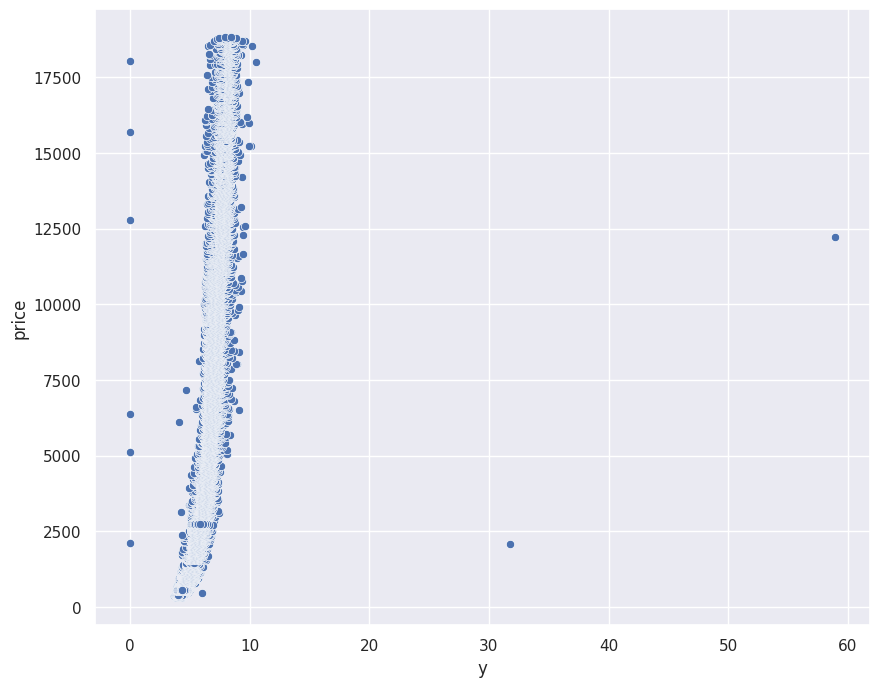

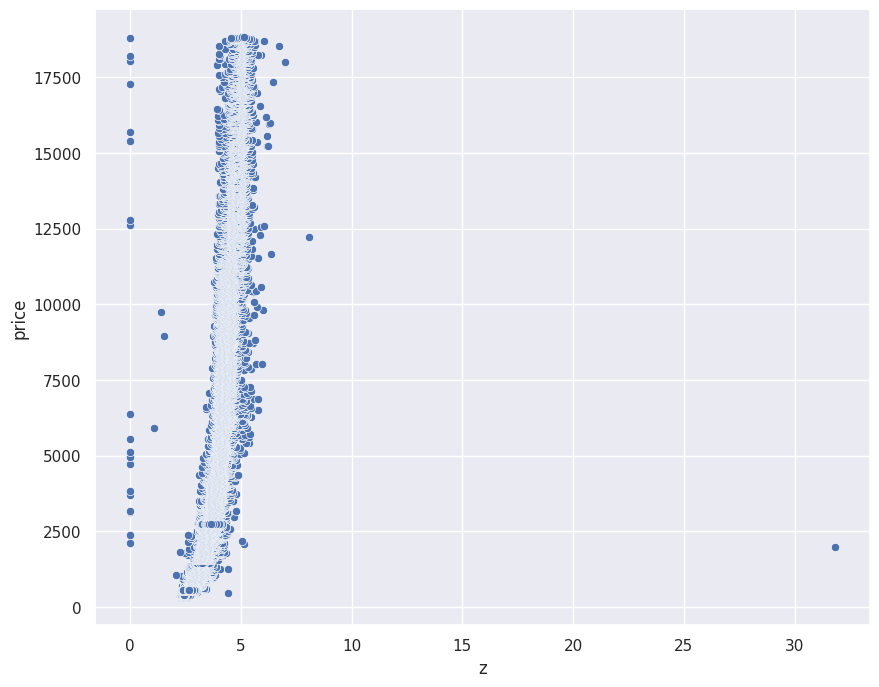

In [16]:
cols= ["x", "y", "z"]
for col in cols:
    sns.scatterplot(x = col, y= "price", data= data)
    plt.show()

* We see that there is more than one outlier. By clearing this data, we can work on the modeling we want to do.

<AxesSubplot: xlabel='price', ylabel='Count'>

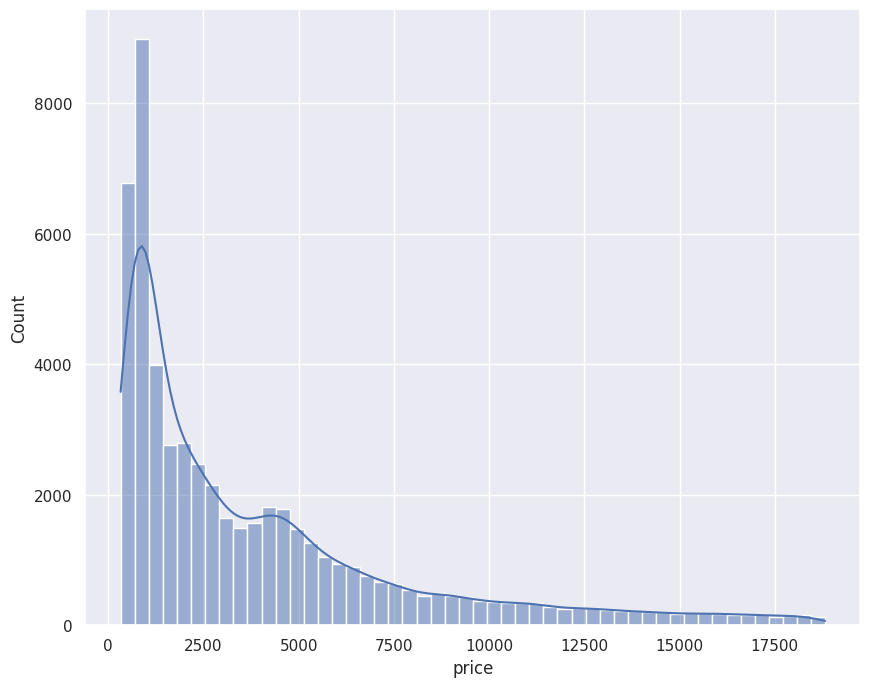

In [17]:
sns.histplot(data["price"], bins=50, kde=True)

* If we want to observe the price distribution more easily, we can use the histogram chart.

Text(0.5, 1.0, 'Classification by Clarity')

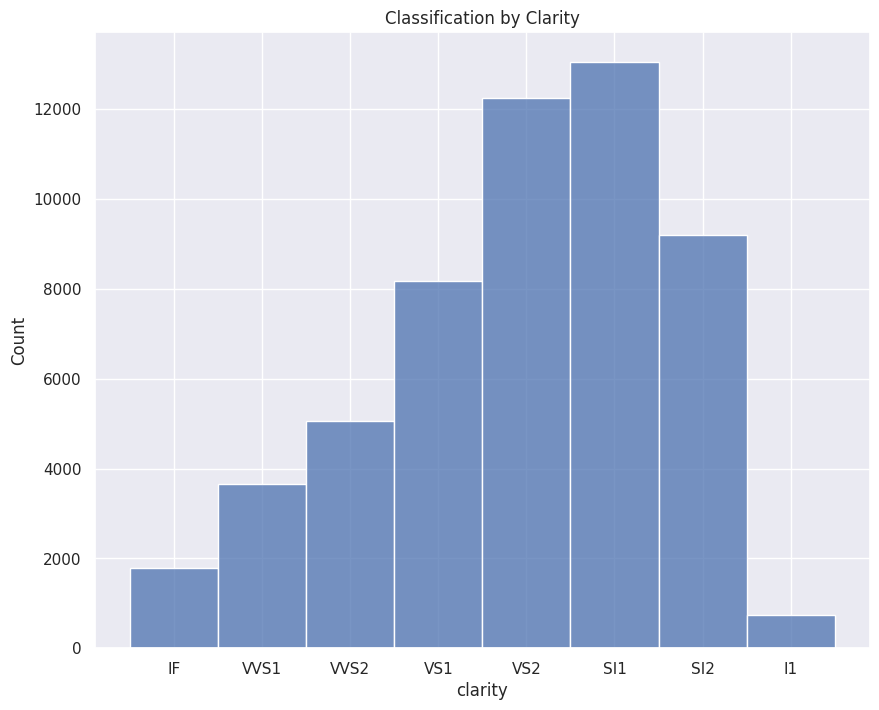

In [18]:
sns.histplot(data["clarity"])
plt.title("Classification by Clarity")

* If we want to examine the corresponding values in classification alone for clarity, we can again use the histogram plot.
* SI1 is most preferred. I1 seems the least.

Text(0.5, 1.0, 'Carat Density')

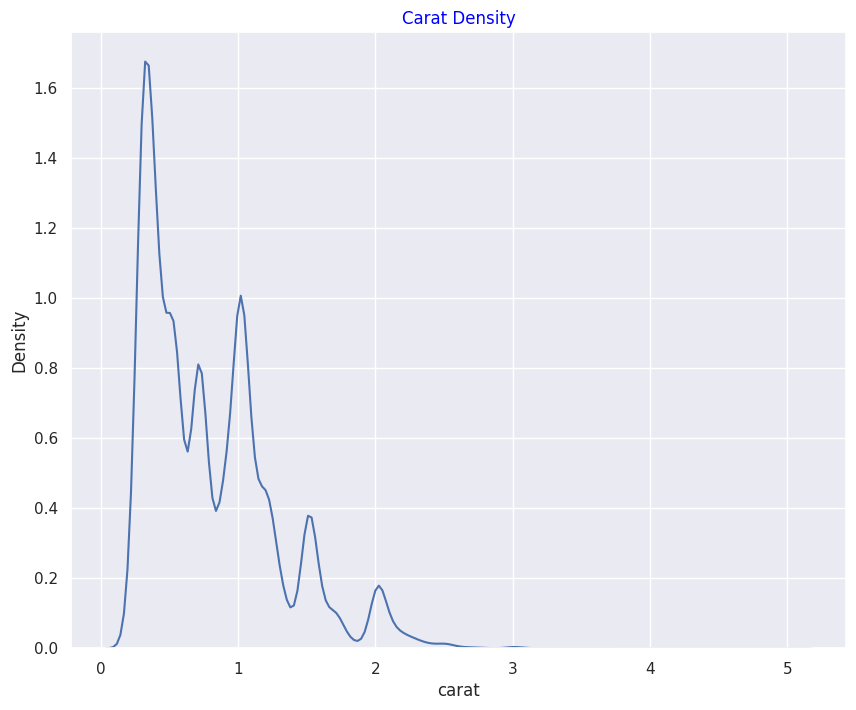

In [19]:
sns.kdeplot(data["carat"])
plt.title("Carat Density", color= "blue")

* In general terms, we can use the kde graph to observe the Karat Density.

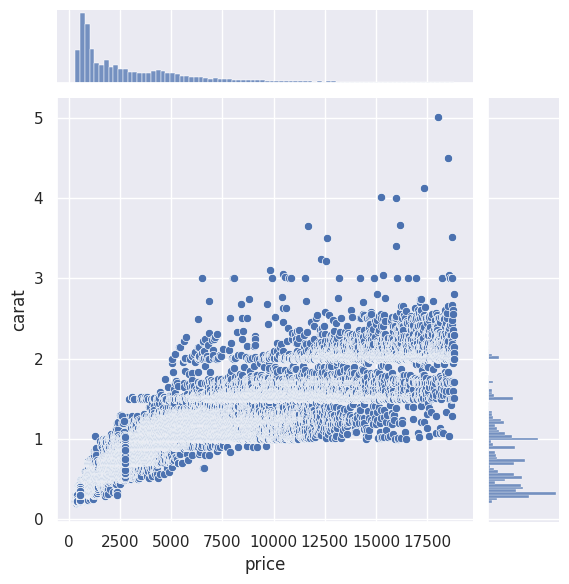

In [20]:
sns.jointplot(x="price", y=data["carat"],data=data)

* A jointplot comprises of 2 histograms of the given variables and 1 scatterplot representing their correlation, by default.

Text(0.5, 1.0, 'Cut-Price-Color')

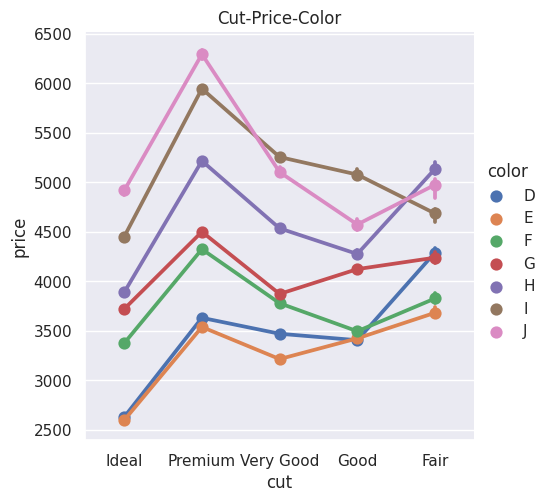

In [21]:
sns.catplot(x="cut", y="price",data= data,
             hue= "color",kind="point", errorbar=("ci", 20), )
plt.title("Cut-Price-Color")

* Categorical Plot is used for visualizing the scattering of a numerical variable corresponding to the elements of a categorical variable.

Text(0.5, 1.0, 'Clarity-Price')

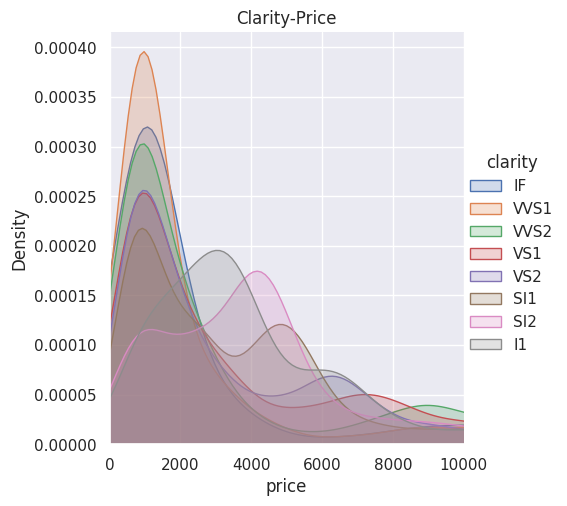

In [22]:
(sns.FacetGrid(data, hue="clarity",height= 5,xlim= (0, 10000)).map(sns.kdeplot,"price", fill= True )).add_legend()
plt.title("Clarity-Price")

* If we want to observe the part that is most intense in terms of clarity and price, this chart will be helpful.
* In the graph, we can say that the density increases in the intersection region of all colors.

/tmp/ipykernel_23/2672235844.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot= True , cmap= "pink")


<AxesSubplot: title={'left': 'Correlation Matrix'}>

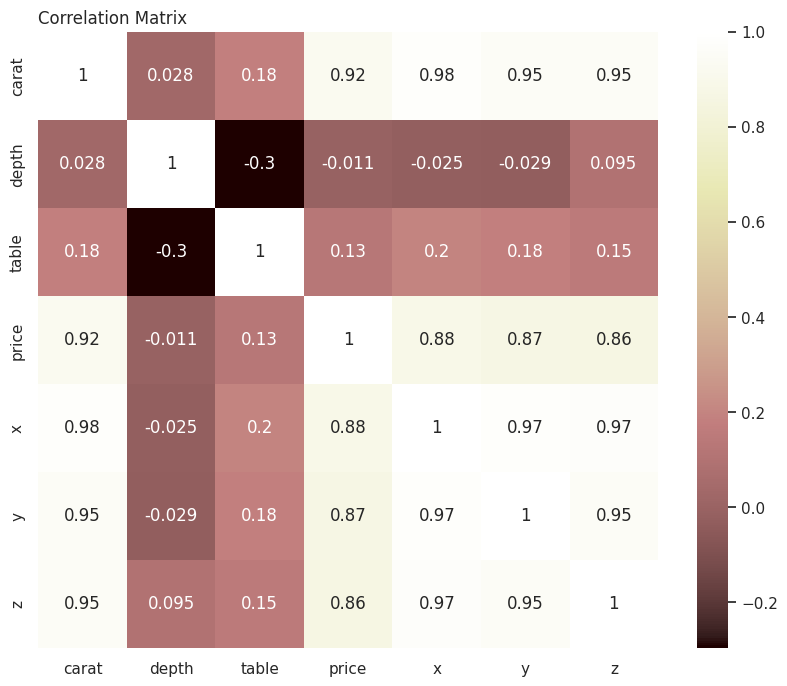

In [23]:
plt.title("Correlation Matrix", loc="left")
sns.heatmap(data.corr(), annot= True , cmap= "pink")

* It is a useful chart to understand the high correlation between the two features.

* In terms of correlation, 1 represents a strong positive relationship between the two columns and -1 represents a strong negative relationship between them.

* Accordingly, we can say that there is a strong relationship between carat and price.
* The worst relationship is between depth and table.

# If you liked this Notebook, please do upvote.
# Thank you